# Implement Bayes Classifier for Iris Dataset.

## Dataset Specifications:
- Total number of samples = 150
- Number of classes = 3 (Iris setosa, Iris virginica, and Iris versicolor)
- Number of samples in each class = 50

Use the following information to design classifier:
    - Number of training feature vectors ( first 40 in each class) = 40
    - Number of test feature vectors ( remaining 10 in each class) = 10
    - Number of dimensions = 4
    - Feature vector = <sepal length, sepal width, petal length, petal width>

If the samples follow a multivariate normal density, find the accuracy of classification for the test
feature vectors.

In [70]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('Iris_dataset.csv')

In [5]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [9]:
df_setosa=df.loc[df['variety']=='Setosa']

In [16]:
df_setosa_train=df_setosa[:-10]
df_setosa_test=df_setosa[-10:]

In [49]:
df_virginica=df.loc[df['variety']=='Virginica']

In [50]:
df_virginica_train=df_virginica[:-10]
df_virginica_test=df_virginica[-10:]

In [51]:
df_versicolor=df.loc[df['variety']=='Versicolor']

In [52]:
df_versicolor_train=df_versicolor[:-10]
df_versicolor_test=df_versicolor[-10:]

In [53]:
pw_s=50/150
pw_vir=50/150
pw_ver=50/150

Find P(ωi|X) =P(X|ωi).P(ωi)/P(X)

P(X) is a constant for all classes; so it can be ignored.

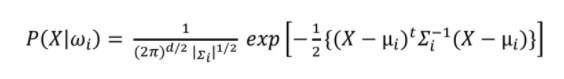

### Calculating mean

In [58]:
mean_vir=df_virginica_train.mean(axis=0)

In [59]:
mean_vir

sepal.length    6.6225
sepal.width     2.9600
petal.length    5.6075
petal.width     1.9900
dtype: float64

In [60]:
mean_s=df_setosa_train.mean()

In [61]:
mean_s

sepal.length    5.0375
sepal.width     3.4525
petal.length    1.4600
petal.width     0.2350
dtype: float64

In [62]:
mean_ver=df_versicolor_train.mean()

In [63]:
mean_ver

sepal.length    6.0100
sepal.width     2.7800
petal.length    4.3175
petal.width     1.3500
dtype: float64

### Covariance

In [64]:
cov_vir=df_virginica_train.cov()

In [65]:
cov_vir

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.467942,0.110410,0.357776,0.051256
sepal.width,0.110410,0.113231,0.081077,0.046256
petal.length,0.357776,0.081077,0.345327,0.059308
petal.width,0.051256,0.046256,0.059308,0.074256


In [66]:
cov_ver=df_versicolor_train.cov()

In [67]:
cov_ver

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.273744,0.086615,0.172128,0.052308
sepal.width,0.086615,0.110872,0.080872,0.045385
petal.length,0.172128,0.080872,0.203532,0.073718
petal.width,0.052308,0.045385,0.073718,0.043077


In [68]:
cov_s=df_setosa_train.cov()

In [69]:
cov_s

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.131122,0.097212,0.013333,0.013269
sepal.width,0.097212,0.130250,0.002154,0.011962
petal.length,0.013333,0.002154,0.029641,0.005026
petal.width,0.013269,0.011962,0.005026,0.009513


### det and inv of det

**Setosa**

In [95]:
det_cov_s=np.linalg.det(cov_s)
det_cov_s

1.563181338318112e-06

In [96]:
inv_cov_s=np.linalg.inv(cov_s)
inv_cov_s

array([[ 18.8146188 , -13.38473529,  -6.47453637,  -5.99346925],
       [-13.38473529,  18.25047066,   5.95329944,  -7.42342518],
       [ -6.47453637,   5.95329944,  39.49229291, -19.31841247],
       [ -5.99346925,  -7.42342518, -19.31841247, 133.02171706]])

**Versicolor**

In [93]:
det_cov_ver=np.linalg.det(cov_ver)
det_cov_ver

2.2963719813256543e-05

In [94]:
inv_cov_ver=np.linalg.inv(cov_ver)
inv_cov_ver

array([[  9.13333334,  -4.07640785,  -9.58250752,   9.60294701],
       [ -4.07640785,  17.71179608,   3.61868629, -19.90341079],
       [ -9.58250752,   3.61868629,  23.00463124, -31.54468702],
       [  9.60294701, -19.90341079, -31.54468702,  86.50595261]])

**Virginica**

In [97]:
det_cov_vir=np.linalg.det(cov_vir)
det_cov_vir

0.00014278663516208078

In [98]:
inv_cov_vir=np.linalg.inv(cov_vir)
inv_cov_vir

array([[ 12.06774374,  -4.8891638 , -12.10821285,   4.38637019],
       [ -4.8891638 ,  14.82114236,   3.00369869,  -8.25671873],
       [-12.10821285,   3.00369869,  15.78668513,  -6.12187765],
       [  4.38637019,  -8.25671873,  -6.12187765,  20.47191629]])

### Function for calculating P(X/wi)

In [100]:
def cal_prob(dim,det,X,mean,inverse):
    t1=1/( (np.pi**(dim/2)) * (det**0.5))
    t2=(np.subtract(X,mean).T) @ inverse @ (np.subtract(X,mean))
    return t1 * np.exp(-0.5 * t2)

### Finding probability

In [130]:
def predict(X):
    p_setosa=cal_prob(4,det_cov_s,X,mean_s,inv_cov_s)
    p_virg=cal_prob(4,det_cov_vir,X,mean_vir,inv_cov_vir)
    p_versi=cal_prob(4,det_cov_ver,X,mean_ver,inv_cov_ver)
    
    class_pred=max(p_setosa,p_versi,p_virg)
#     print(p_setosa,p_versi,p_virg)
    
    if(class_pred==p_setosa):
        return "Setosa"
    elif (class_pred==p_virg):
        return "Virginica"
    else:
        return "Versicolor"


#### Testing setosa

In [131]:
results_setosa=[]
for i in range(10):
    results_setosa.append(predict(df_setosa_test[df_setosa_test.columns[:4]].iloc[i]))

In [132]:
results_setosa

['Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa',
 'Setosa']

#### Testing virginica

#### Testing versicolor

### Finding discriminant function